## 二、数据可视化
__author__ = 'hehuihui@caicloud.io'

In [1]:
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.dates import WeekdayLocator, MONDAY, DateFormatter, date2num
from matplotlib.finance import candlestick, candlestick2

%matplotlib inline

#### 读取数据

In [2]:
df = pd.read_csv('../data/000002.csv')
df.drop('code', axis=1, inplace=True)
df['datetime'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

#### a) 画出股票的最近一年的日K线图（包含蜡烛条、成交量、MA5、MA10、MA30）

In [3]:
# 画最后200个交易日的K线图
length = 200
dataframe = df.iloc[-length:, :]
dataframe.reset_index(drop=True, inplace=True)

# 计算成交量柱状图的颜色（红涨绿跌）
change = dataframe['open'] - dataframe['close']
volume_color = change.apply(lambda x: 'g' if x > 0 else 'r') # r: red; g: green
volume_color = ''.join(volume_color)

# 计算MA5、MA10、MA30
MA5 = dataframe['close'].rolling(window=5).mean()
MA10 = dataframe['close'].rolling(window=10).mean()
MA30 = dataframe['close'].rolling(window=30).mean()


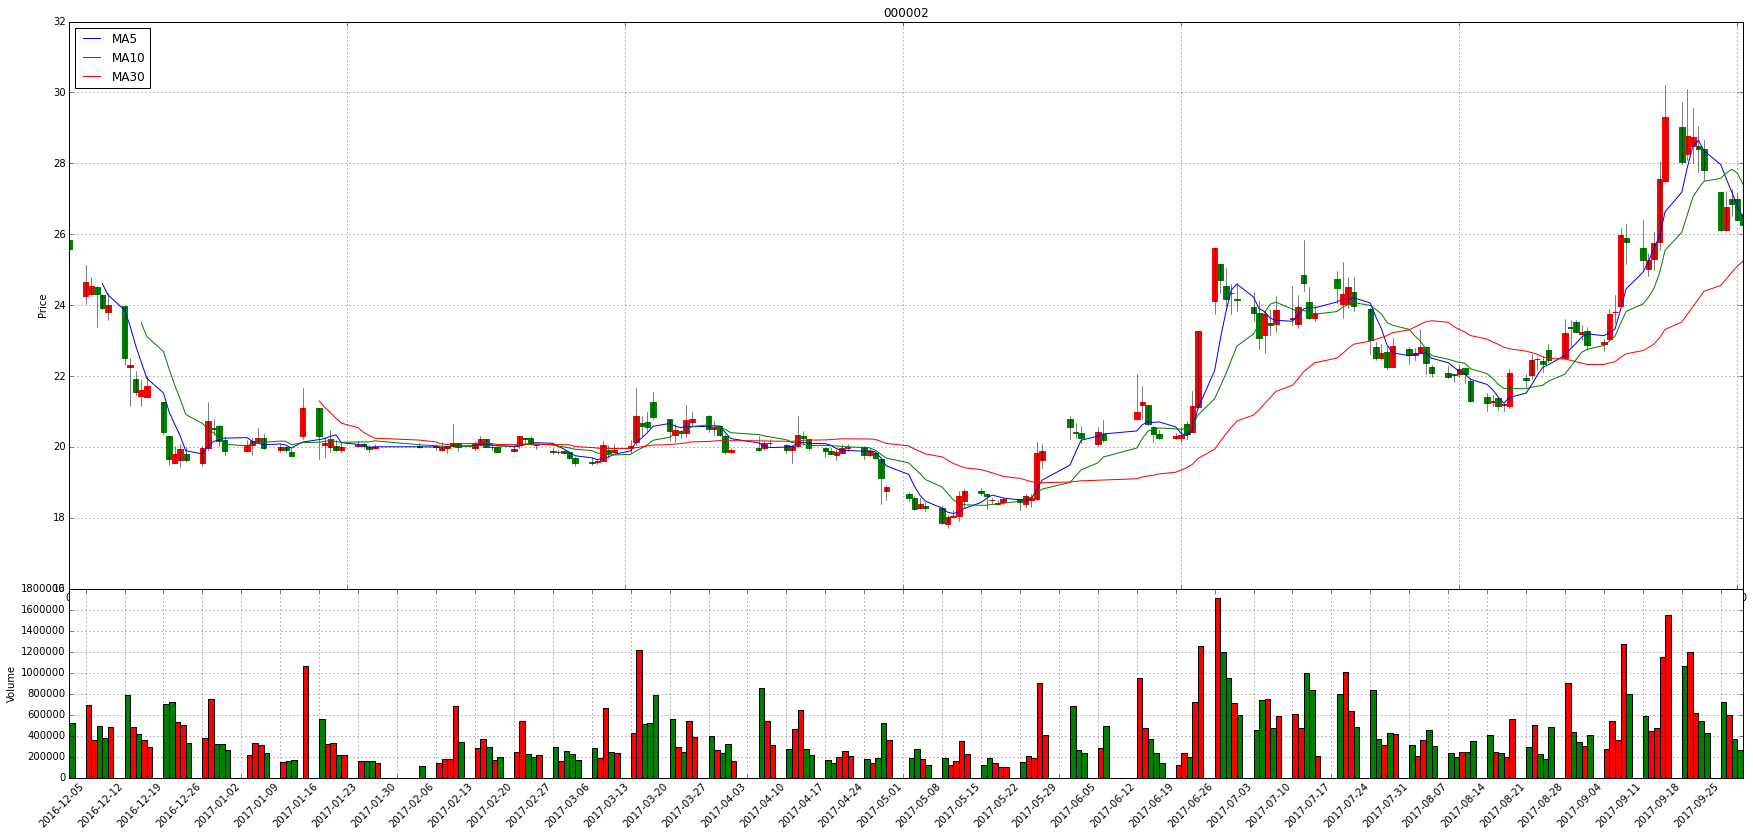

In [4]:
# 创建一个画板(fig)，两个子图(ax1, ax2)
fig = plt.figure(figsize=(30, 15))
ax1 = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
ax2 = plt.subplot2grid((4, 4), (3, 0), rowspan=1, colspan=4)

# 缩短两个子图间的垂直间距
plt.subplots_adjust(bottom=0.2, hspace=0)

# 取出开盘价、收盘价、最高价、最低价
matrix = dataframe.as_matrix()
# 计算x轴坐标
xlabel = date2num(dataframe['datetime'])
matrix[:, 0] = xlabel

# 画出蜡烛图
candlestick(ax1, matrix, width=1, colorup='r', colordown='g')

# 画出MA5、MA10、MA30
ax1.plot(xlabel, MA5, label='MA5')
ax1.plot(xlabel, MA10, label='MA10')
ax1.plot(xlabel, MA30, label='MA30')

# 设置x轴坐标日期
ax1.set_xlim(xlabel[0], xlabel[-1])
ax1.set_title('000002')
ax1.set_ylabel('Price')
ax1.legend(loc='upper left')
ax1.grid(True)


# 画出成交量柱状图
ax2.bar(xlabel, dataframe['volume'], width=1, color=volume_color)
ax2.set_ylabel('Volume')

ax2.set_xlim(xlabel[0], xlabel[-1])
ax2.grid(True)

# 设置子图2的x轴坐标为日期
ax2.xaxis.set_major_locator(WeekdayLocator(MONDAY))  # 空间小，不能显示所有日期；只显示周一
ax2.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))

# 旋转45度
plt.setp(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()


#### b) 画出股票涨跌幅度的分布图（柱形图或饼图）
#### 用于表示X%<=涨跌幅<=(X+1)%的交易日各有多少天、占比多少，其中X为整数且-10<= X <= 10

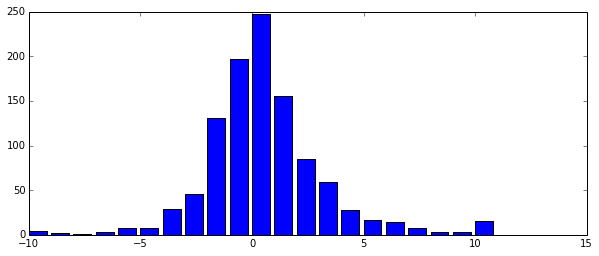

In [5]:
# 计算涨跌幅的百分率值，四舍五入
change = df['close'].pct_change() * 100
change = change.apply(lambda x: round(x))

# 统计涨幅比例，并排序
change_statistics = change.value_counts()
change_statistics.sort_index(inplace=True)

# 画出其柱状图
fig = plt.figure(figsize=(10, 4))
plt.bar(change_statistics.index, height=change_statistics.values)
plt.show()